In [56]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
# Global constants
N = 100 # number of samples per class
D = 2 # number of features
K = 3 # number of classes
REGULARIZATION_RATE = 1e-3
LEARNING_RATE = 1e-0

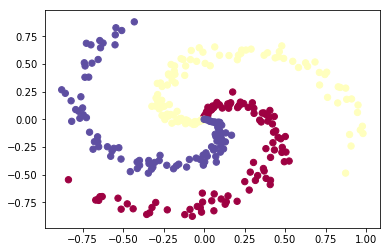

In [58]:
#Generating data
X = np.zeros((N * K, D))
Y = np.zeros(N*K, dtype = 'uint8')

for j in range(K):
    ix = [e for e in range(N*j, N * (j + 1))] #indexes of elements for current class
    r = np.linspace(0., 1., N) # radiuses for element
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 #theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    Y[ix] = j
    
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 40, cmap = plt.cm.Spectral)
plt.show()

In [59]:
# Softmax linear classifier
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

num_of_examples = X.shape[0]
scores = np.dot(X, W) + b
num_examples = X.shape[0]
exp_scores = np.exp(scores)
sum_of_exp = np.sum(exp_scores, axis = 1, keepdims = True)
probs = exp_scores / sum_of_exp

log_prob = - np.log(probs[np.arange(num_of_examples), Y])
data_loss = np.sum(log_prob) / num_of_examples
regularization_loss = 0.5 * REGULARIZATION_RATE * np.sum(W * W)
loss = data_loss + regularization_loss
print(loss)

1.09722397525


In [60]:
#Calculate gradient
dscores = probs
dscores[np.arange(num_of_examples), Y] -= 1
dscores /= num_of_examples

dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis = 0, keepdims = True)
dW += REGULARIZATION_RATE * W

In [61]:
# Performing a parameter update
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db 

In [62]:
def iteration(X, Y, W, b):
    num_of_examples = X.shape[0]
    scores = np.dot(X, W) + b
    num_examples = X.shape[0]
    exp_scores = np.exp(scores)
    sum_of_exp = np.sum(exp_scores, axis = 1, keepdims = True)
    probs = exp_scores / sum_of_exp

    log_prob = - np.log(probs[np.arange(num_of_examples), Y])
    data_loss = np.sum(log_prob) / num_of_examples
    regularization_loss = 0.5 * REGULARIZATION_RATE * np.sum(W * W)
    loss = data_loss + regularization_loss
    dscores = probs
    dscores[np.arange(num_of_examples), Y] -= 1
    dscores /= num_of_examples

    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)
    dW += REGULARIZATION_RATE * W
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db
    
    return loss

In [63]:
for i in range(10000):
    loss = iteration(X, Y, W, b)
    if i % 1000 == 0: print('%s: %s' % (i, loss))

0: 1.06764390702
1000: 0.764099283055
2000: 0.764099273481
3000: 0.764099272187
4000: 0.764099272011
5000: 0.764099271988
6000: 0.764099271985
7000: 0.764099271984
8000: 0.764099271984
9000: 0.764099271984


In [66]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == Y)))

training accuracy: 0.52


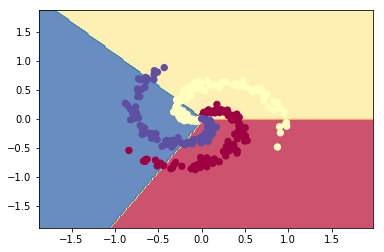

In [69]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()